In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load data
df = pd.read_csv('clean_employee_data.csv')

In [3]:
# Setup plot
plt.figure(figsize=(6, 4))
sns.set_style("whitegrid")

<Figure size 600x400 with 0 Axes>

/tmp/ipython-input-2895461170.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='attrition', data=df, palette='viridis')


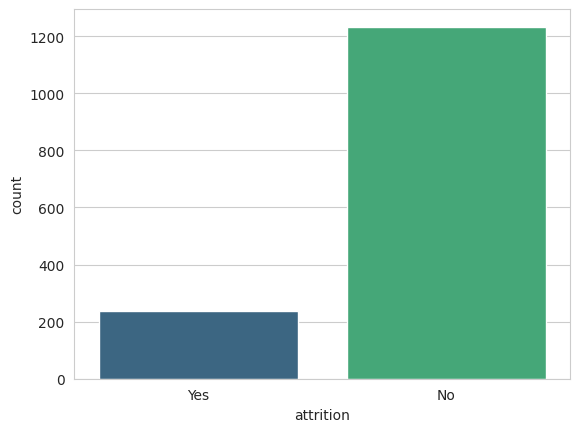

In [4]:
# Create the chart
ax = sns.countplot(x='attrition', data=df, palette='viridis')

Text(0, 0.5, 'Count')

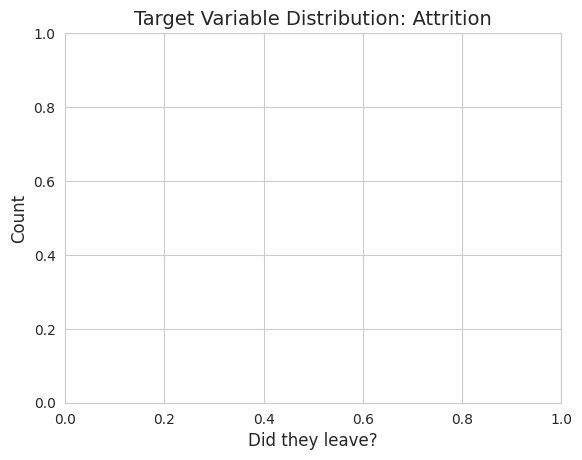

In [5]:
# Labels
plt.title('Target Variable Distribution: Attrition', fontsize=14)
plt.xlabel('Did they leave?', fontsize=12)
plt.ylabel('Count', fontsize=12)

In [6]:
# Show the specific numbers on the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + 0.35, p.get_height() + 20))

plt.show()

In [7]:
# Print exact percentages
print(df['attrition'].value_counts(normalize=True) * 100)

attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64


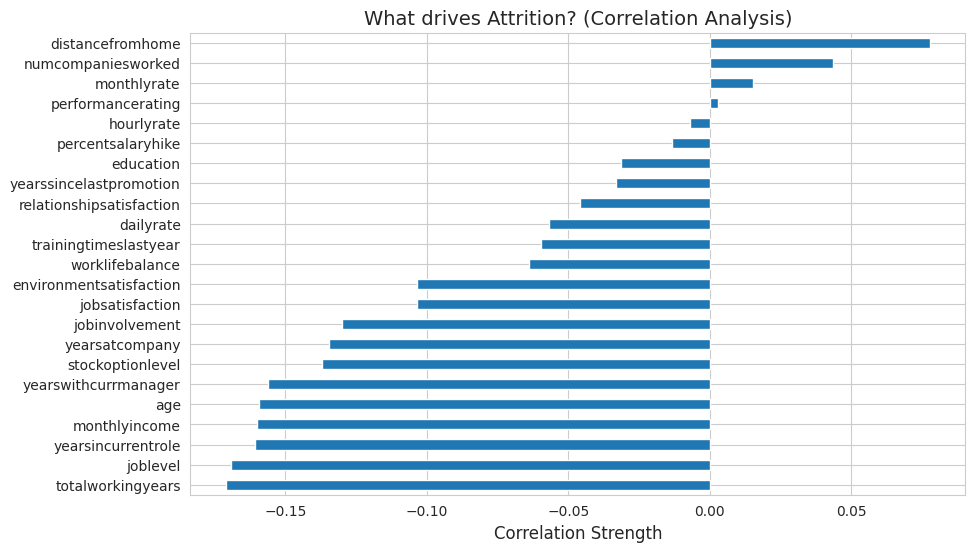

In [8]:
# Check correlation between numerical features and Attrition
# convert 'Yes'/'No' to 1/0
df['attrition_num'] = df['attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

# Calculate correlations
correlations = df.corr(numeric_only=True)['attrition_num'].sort_values()

# Plot the top positive and negative correlations
plt.figure(figsize=(10, 6))
correlations.drop('attrition_num').plot(kind='barh')
plt.title('What drives Attrition? (Correlation Analysis)', fontsize=14)
plt.xlabel('Correlation Strength', fontsize=12)
plt.show()